In [1]:
# Import Basic Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Importing Warnings to ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
df = pd.read_csv('stock_data.csv')

In [3]:
df.head()

,Date,Adj Close,Volume
0,2000-01-03,29.684195,28802010.0
1,2000-01-04,32.060574,61320457.0
2,2000-01-05,33.316589,173426953.0
3,2000-01-06,34.714111,101355113.0
4,2000-01-07,37.096405,128426756.0


In [4]:
df.tail() 

,Date,Adj Close,Volume
5750,2022-12-26,2524.050049,2764496.0
5751,2022-12-27,2544.699951,2659749.0
5752,2022-12-28,2544.449951,3442509.0
5753,2022-12-29,2543.300049,3198493.0
5754,2022-12-30,2547.199951,3364092.0


# EDA

In [5]:
df.shape

(5755, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5755 non-null   object 
 1   Adj Close  5745 non-null   float64
 2   Volume     5745 non-null   float64
dtypes: float64(2), object(1)
memory usage: 135.0+ KB


In [7]:
df['Date']=pd.to_datetime(df['Date'])# Changing Date datatype from object todatetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5755 non-null   datetime64[ns]
 1   Adj Close  5745 non-null   float64       
 2   Volume     5745 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 135.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,5745.0,6.155926e+02,6.821515e+02,23.964355,8.911565e+01,4.184002e+02,6.380904e+02,2.811386e+03
Volume,5745.0,1.681692e+07,1.809928e+07,0.000000,6.334809e+06,1.016516e+07,2.036854e+07,2.918015e+08


In [9]:
df=df.rename(columns = {'Adj Close':'Adj_Close'})#renaming the column
df

,Date,Adj_Close,Volume
0,2000-01-03,29.684195,28802010.0
1,2000-01-04,32.060574,61320457.0
2,2000-01-05,33.316589,173426953.0
3,2000-01-06,34.714111,101355113.0
4,2000-01-07,37.096405,128426756.0
...,...,...,...
5750,2022-12-26,2524.050049,2764496.0
5751,2022-12-27,2544.699951,2659749.0
5752,2022-12-28,2544.449951,3442509.0
5753,2022-12-29,2543.300049,3198493.0


### Checking For Duplicate & Missing Values

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date          0
Adj_Close    10
Volume       10
dtype: int64

### Filling Null values 

In [12]:
df=df.fillna(df.mean()) #filled null values with their column mean value
df

,Date,Adj_Close,Volume
0,2000-01-03,29.684195,28802010.0
1,2000-01-04,32.060574,61320457.0
2,2000-01-05,33.316589,173426953.0
3,2000-01-06,34.714111,101355113.0
4,2000-01-07,37.096405,128426756.0
...,...,...,...
5750,2022-12-26,2524.050049,2764496.0
5751,2022-12-27,2544.699951,2659749.0
5752,2022-12-28,2544.449951,3442509.0
5753,2022-12-29,2543.300049,3198493.0


In [13]:
print(df.isnull().sum())

Date         0
Adj_Close    0
Volume       0
dtype: int64


### Extracting Year,Quarter,Month,Week & Day from Date Column 

In [14]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["year"]=df.Date.dt.year
df['quarter'] = df.Date.dt.quarter #pd.PeriodIndex(df.Date, freq='Q')
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df

,Date,Adj_Close,Volume,year,quarter,month,week,day
0,2000-01-03,29.684195,28802010.0,2000,1,1,1,3
1,2000-01-04,32.060574,61320457.0,2000,1,1,1,4
2,2000-01-05,33.316589,173426953.0,2000,1,1,1,5
3,2000-01-06,34.714111,101355113.0,2000,1,1,1,6
4,2000-01-07,37.096405,128426756.0,2000,1,1,1,7
...,...,...,...,...,...,...,...,...
5750,2022-12-26,2524.050049,2764496.0,2022,4,12,52,26
5751,2022-12-27,2544.699951,2659749.0,2022,4,12,52,27
5752,2022-12-28,2544.449951,3442509.0,2022,4,12,52,28
5753,2022-12-29,2543.300049,3198493.0,2022,4,12,52,29


## Correlation analysis

In [15]:
correlation = df['Volume'].corr(df['Adj_Close'])
print('Correlation Coefficient:', correlation)

Correlation Coefficient: -0.317065069709511


we can observe both volume and Adj_close attributes are -vely correlated to each other

### Heatmap for Correlation Analysis

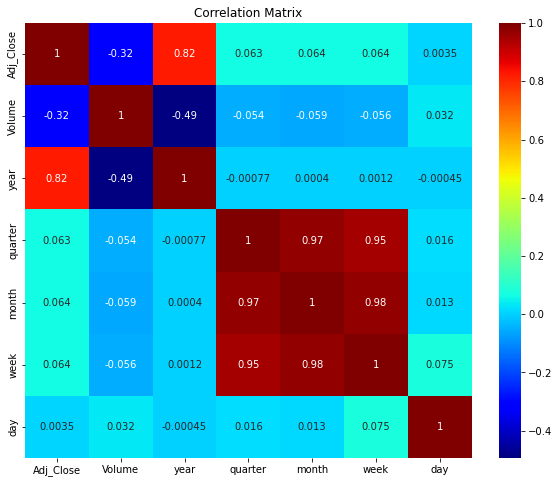

In [16]:
#Heatmap for Entire Data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='month', ylabel='year'>

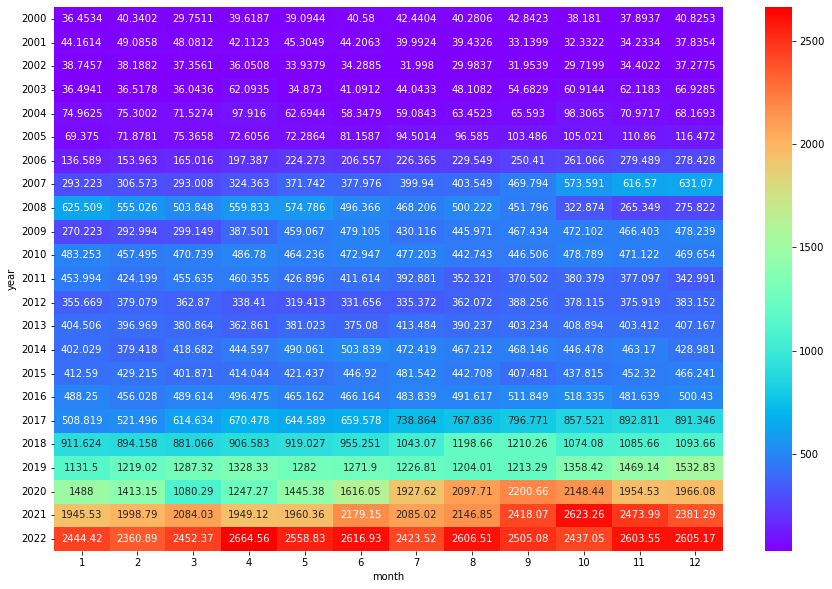

In [17]:
plt.figure(figsize=(15,10))
heatmap_y_month = pd.pivot_table(data=df,values="Adj_Close",index="year",columns="month",aggfunc="mean",fill_value=0)
#creating a pivot table with index as year, columns as month, values as Adj_Close,aggfunc as mean(this belongs to pivot table ie parameter of pvt tble)
heatmap_y_month
sns.heatmap(heatmap_y_month,annot=True,fmt="g",cmap='rainbow') 

## Visualization

### Box & Whisker plot

<AxesSubplot:title={'center':'Yearly Adj Closing Price'}, xlabel='year', ylabel='Adj_Close'>

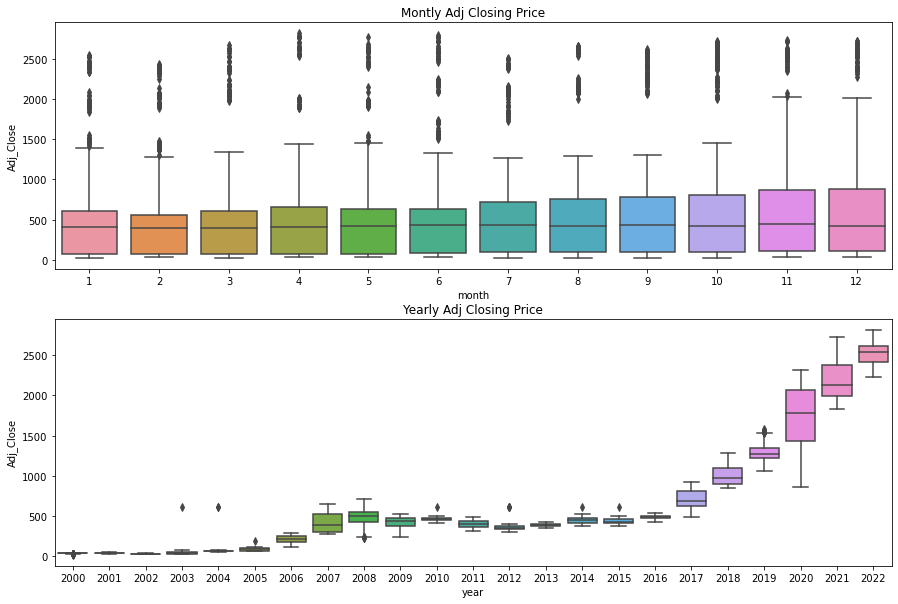

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Montly Adj Closing Price")
sns.boxplot(x="month",y="Adj_Close",data=df)
plt.subplot(212)
plt.title("Yearly Adj Closing Price")
sns.boxplot(x="year",y="Adj_Close",data=df)

### Line Plot

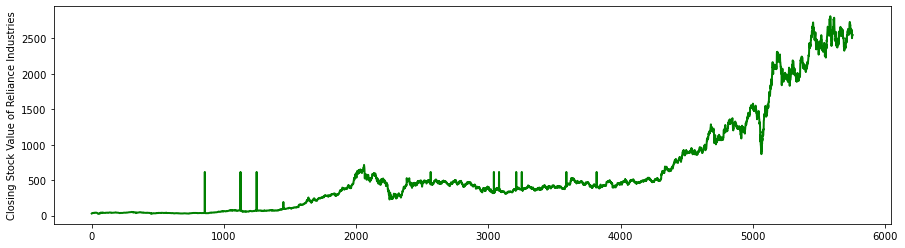

In [19]:
# Lineplot for Closing Stock value
plt.figure(figsize=(15,4))
plt.ylabel("Closing Stock Value of Reliance Industries")
plt.plot(df['Adj_Close'], linewidth=2,color='green')
plt.show()

<AxesSubplot:xlabel='year', ylabel='Adj_Close'>

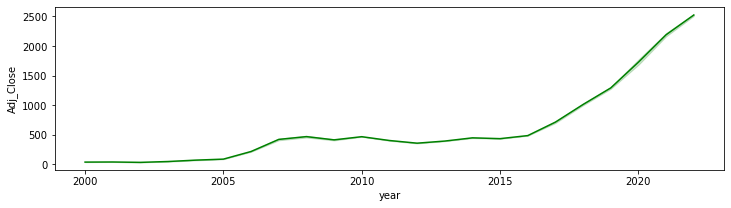

In [20]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Adj_Close",data=df,color='green') #yearly closing value

<AxesSubplot:xlabel='month', ylabel='Adj_Close'>

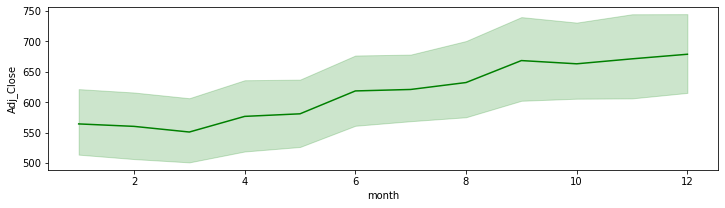

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Adj_Close",data=df,color='green') #monthly closing value

### Q-Q plot of Adj_Close
used to determine whether dataset is distributed a certain way

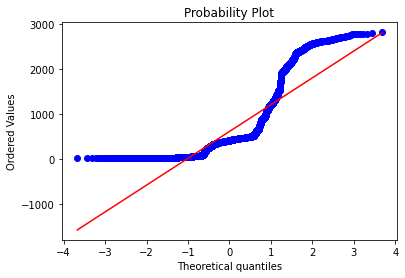

In [22]:
import scipy.stats
import pylab
scipy.stats.probplot(df.Adj_Close,plot=pylab)
pylab.show()

### Histogram


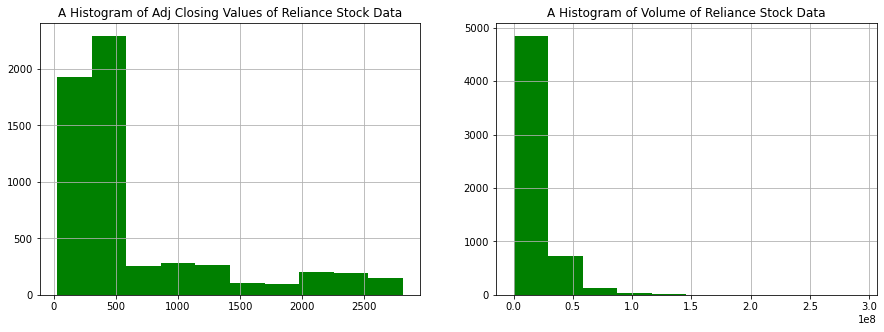

In [23]:
plt.subplot(1,2,1)
df['Adj_Close'].hist(figsize=(15,5),color='green')
plt.title('A Histogram of Adj Closing Values of Reliance Stock Data')
plt.subplot(1,2,2)
df['Volume'].hist(figsize=(15,5),color='green')
plt.title('A Histogram of Volume of Reliance Stock Data')
plt.show()

### Density Plot


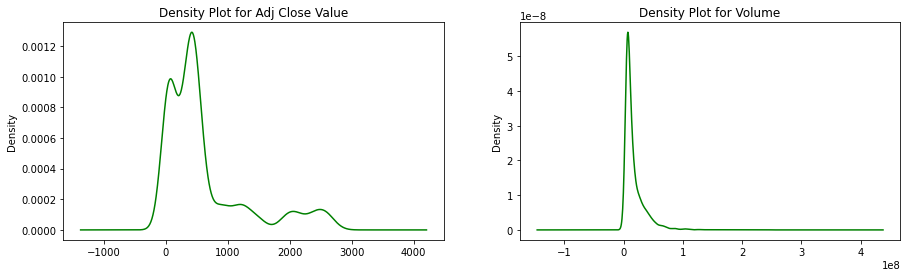

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df.Adj_Close.plot.density(color='green')
plt.title('Density Plot for Adj Close Value')
plt.subplot(1,2,2)
df.Volume.plot.density(color='green')
plt.title('Density Plot for Volume')
plt.show()

### Lag Plots 

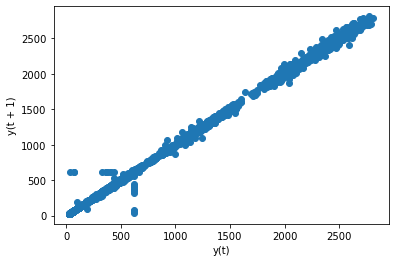

In [25]:
from pandas.plotting import lag_plot

lag_plot(df['Adj_Close'])
plt.show()
#Strongly linearly correlated

###  ACF plots and PACF plots

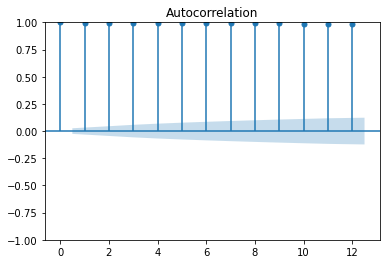

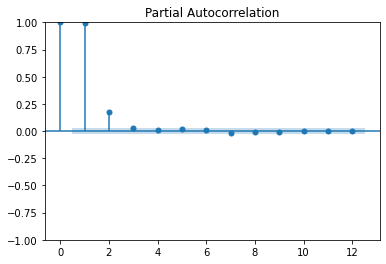

In [26]:
#importing tsa plots
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(df.Adj_Close,lags=12) #ACF Plot

tsa_plots.plot_pacf(df.Adj_Close,lags=12) #PACF Plot
plt.show()

### Extracting Daily returns

In [27]:
df['Daily_Return'] = df['Adj_Close'].pct_change()
df

,Date,Adj_Close,Volume,year,quarter,month,week,day,Daily_Return
0,2000-01-03,29.684195,28802010.0,2000,1,1,1,3,NaN
1,2000-01-04,32.060574,61320457.0,2000,1,1,1,4,0.080055
2,2000-01-05,33.316589,173426953.0,2000,1,1,1,5,0.039176
3,2000-01-06,34.714111,101355113.0,2000,1,1,1,6,0.041947
4,2000-01-07,37.096405,128426756.0,2000,1,1,1,7,0.068626
...,...,...,...,...,...,...,...,...,...
5750,2022-12-26,2524.050049,2764496.0,2022,4,12,52,26,0.008732
5751,2022-12-27,2544.699951,2659749.0,2022,4,12,52,27,0.008181
5752,2022-12-28,2544.449951,3442509.0,2022,4,12,52,28,-0.000098
5753,2022-12-29,2543.300049,3198493.0,2022,4,12,52,29,-0.000452


In [28]:
mean_dr = np.mean(df['Daily_Return'])
mean_dr #average of daily returns

0.006231727771954743

###  Down Sampling

**Making Date Column as Index**

In [29]:
df.set_index('Date',inplace=True)

In [30]:
df

,Adj_Close,Volume,year,quarter,month,week,day,Daily_Return
Date,,,,,,,,
2000-01-03,29.684195,28802010.0,2000,1,1,1,3,NaN
2000-01-04,32.060574,61320457.0,2000,1,1,1,4,0.080055
2000-01-05,33.316589,173426953.0,2000,1,1,1,5,0.039176
2000-01-06,34.714111,101355113.0,2000,1,1,1,6,0.041947
2000-01-07,37.096405,128426756.0,2000,1,1,1,7,0.068626
...,...,...,...,...,...,...,...,...
2022-12-26,2524.050049,2764496.0,2022,4,12,52,26,0.008732
2022-12-27,2544.699951,2659749.0,2022,4,12,52,27,0.008181
2022-12-28,2544.449951,3442509.0,2022,4,12,52,28,-0.000098


**Downsampling the Date wise Data into Quarterly wise for better understanding and better model building**

In [31]:
Quarterlydata = df.resample('Q').mean()
Quarterlydata

,Adj_Close,Volume,year,quarter,month,week,day,Daily_Return
Date,,,,,,,,
2000-03-31,35.337539,6.006248e+07,2000.0,1.0,2.030769,7.000000,15.753846,0.004415
2000-06-30,39.758554,5.871569e+07,2000.0,2.0,5.030769,20.000000,15.738462,0.001991
2000-09-30,41.806032,3.186951e+07,2000.0,3.0,8.000000,33.000000,16.000000,0.000282
2000-12-31,38.938070,2.292926e+07,2000.0,4.0,10.984615,46.000000,15.800000,-0.000032
2001-03-31,47.003284,3.917811e+07,2001.0,1.0,1.984615,7.000000,15.492308,0.002369
...,...,...,...,...,...,...,...,...
2021-12-31,2487.533726,6.163782e+06,2021.0,4.0,11.047619,46.000000,15.825397,-0.000822
2022-03-31,2419.769663,6.354418e+06,2022.0,1.0,2.016393,6.852459,15.442623,0.001913
2022-06-30,2611.850956,7.820119e+06,2022.0,2.0,5.048387,19.983871,16.048387,-0.000046


## Model Building 

### Splitting Data 
 Here splitting data in the **ratio of 80:20** for Training and Testing respectively

In [32]:
Train = Quarterlydata.head(73)
Test = Quarterlydata.tail(19) 

### Data Driven Forecasting Methods
Under Data Driven Forcasting Methods we use 
1. Moving Average Method
2. Simple Exponential Smoothing Technique
3. Advance Exponential Smoothing Techniques --> a) Holt's Method
   b) Holt's Winter Method
   

In [33]:
#Importing Data driven forecasting methods libraries
from statsmodels.tsa.seasonal import seasonal_decompose #Seasonal Decompose library to know the trend, seasonality and resid
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

### Moving average Method

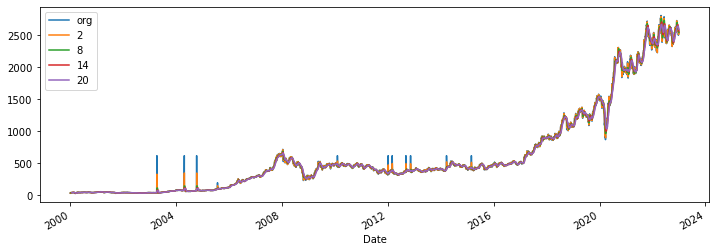

In [34]:
plt.figure(figsize=(12,4))
df.Adj_Close.plot(label="org")
for i in range(2,24,6):#range from 2 to 24  with step size of 6
    df["Adj_Close"].rolling(i).mean().plot(label=str(i)) 
plt.legend(loc='best') 

### Time series decomposition plot 

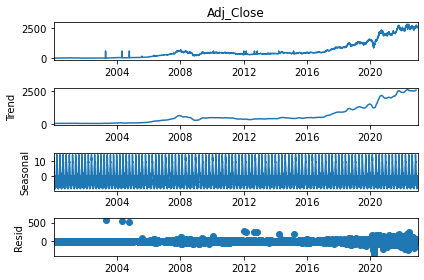

In [35]:
decompose_ts_add = seasonal_decompose(df.Adj_Close,period=52)
decompose_ts_add.plot()
plt.show()

To Calcute the **Mean Absolute Percentage Error** we will define a function 

In [36]:
def MAPE(pred,org): #mean absolute percentage error
    temp = np.abs((pred-org)/org)*100 #mape function = prediction value-orginal value for error(e),by orginal value *100 for percentage(p),.abs for absolute
    return np.mean(temp)  #and taking mean of it toget MAPE

To Calculate the **Root Mean Square Error** we will define a function

In [37]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [38]:
Train["Adj_Close"] = Train["Adj_Close"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Adj_Close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
mape_ses_model=MAPE(pred_ses,Test.Adj_Close)   
rmse_ses_model=RMSE(Test.Adj_Close, pred_ses)
print("MAPE Value for SES = " ,mape_ses_model)
print("RMSE Value for SES = " ,rmse_ses_model)

MAPE Value for SES =  57.41269959527715
RMSE Value for SES =  1244.6083962152773


### Holt method 

In [39]:
hw_model = Holt(Train["Adj_Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
mape_hw_model=MAPE(pred_hw,Test.Adj_Close) 
rmse_hw_model=RMSE(Test.Adj_Close, pred_hw)
print("MAPE Value for Holt =" ,mape_hw_model)
print("RMSE Value for Holt =" ,rmse_hw_model)

MAPE Value for Holt = 15.675038870143533
RMSE Value for Holt = 428.60039003084125


### Holts winter exponential smoothing method

In [40]:
hwe_model = ExponentialSmoothing(Train["Adj_Close"]).fit() #add the trend to the model
pred_hwe = hwe_model.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model=MAPE(pred_hwe,Test.Adj_Close)
rmse_hwe_model=RMSE(Test.Adj_Close, pred_hwe)
print("MAPE Value for Holt Winter Exponential =" ,mape_hwe_model)
print("RMSE Value for Holt Winter Exponential =" ,rmse_hwe_model)

MAPE Value for Holt Winter Exponential = 44.174788615351744
RMSE Value for Holt Winter Exponential = 1059.797141487305


### Holts winter exponential smoothing with additive seasonality and additive trend

In [41]:
hwe_model_add_add = ExponentialSmoothing(Train["Adj_Close"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_add_add=MAPE(pred_hwe_add_add,Test.Adj_Close)  
rmse_hwe_model_add_add=RMSE(Test.Adj_Close, pred_hwe_add_add)
print("MAPE Value for Holt Winter Exponential =" ,mape_hwe_model_add_add)
print("RMSE Value for Holt Winter Exponential =" ,rmse_hwe_model_add_add)

MAPE Value for Holt Winter Exponential = 13.029692743009894
RMSE Value for Holt Winter Exponential = 343.7053626356921


### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [42]:
hwe_model_mul_add = ExponentialSmoothing(Train["Adj_Close"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_mul_add=MAPE(pred_hwe_mul_add,Test.Adj_Close) 
rmse_hwe_model_mul_add=RMSE(Test.Adj_Close, pred_hwe_mul_add)
print("MAPE Value for Holt Winter Exponential =" ,mape_hwe_model_mul_add)
print("RMSE Value for Holt Winter Exponential =" ,rmse_hwe_model_mul_add)

MAPE Value for Holt Winter Exponential = 19.205554223421217
RMSE Value for Holt Winter Exponential = 377.9533152626947


In [43]:
#Compare the results 

data = {"MODEL":pd.Series(["ses_model","holt_model","holt_winter_model","holtw_add_add_model","holtw_mult_add_model"]),
        "MAPE_Values":pd.Series([mape_ses_model,mape_hw_model,mape_hwe_model,mape_hwe_model_add_add,mape_hwe_model_mul_add]),
        "RMSE_Values":pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_model,rmse_hwe_model_add_add,rmse_hwe_model_mul_add])}
table_data_driven=pd.DataFrame(data)
table_data_driven.sort_values(['RMSE_Values','MAPE_Values'],ascending = [True, True]) 

,MODEL,MAPE_Values,RMSE_Values
3,holtw_add_add_model,13.029693,343.705363
4,holtw_mult_add_model,19.205554,377.953315
1,holt_model,15.675039,428.600390
2,holt_winter_model,44.174789,1059.797141
0,ses_model,57.412700,1244.608396


## Model based Forecasting Methods

In [44]:
# Data preprocessing for models
Quarterlydata["t"] = np.arange(1,93)
Quarterlydata["t_squared"] = Quarterlydata["t"]*Quarterlydata["t"]
Quarterlydata["log_Adj_Close"] = np.log(df["Adj_Close"])
Quarterlydata

,Adj_Close,Volume,year,quarter,month,week,day,Daily_Return,t,t_squared,log_Adj_Close
Date,,,,,,,,,,,
2000-03-31,35.337539,6.006248e+07,2000.0,1.0,2.030769,7.000000,15.753846,0.004415,1,1,3.619542
2000-06-30,39.758554,5.871569e+07,2000.0,2.0,5.030769,20.000000,15.738462,0.001991,2,4,3.715083
2000-09-30,41.806032,3.186951e+07,2000.0,3.0,8.000000,33.000000,16.000000,0.000282,3,9,NaN
2000-12-31,38.938070,2.292926e+07,2000.0,4.0,10.984615,46.000000,15.800000,-0.000032,4,16,NaN
2001-03-31,47.003284,3.917811e+07,2001.0,1.0,1.984615,7.000000,15.492308,0.002369,5,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2487.533726,6.163782e+06,2021.0,4.0,11.047619,46.000000,15.825397,-0.000822,88,7744,7.766858
2022-03-31,2419.769663,6.354418e+06,2022.0,1.0,2.016393,6.852459,15.442623,0.001913,89,7921,7.873537
2022-06-30,2611.850956,7.820119e+06,2022.0,2.0,5.048387,19.983871,16.048387,-0.000046,90,8100,7.858586


In [45]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies=pd.DataFrame(pd.get_dummies(Quarterlydata['quarter']))
df=pd.concat([Quarterlydata,Quarters_Dummies],axis = 1)
df=df.rename(columns={df.columns[11]: 'Q1', df.columns[12]: 'Q2',df.columns[13]: 'Q3',df.columns[14]: 'Q4'})#renaming the column
df

,Adj_Close,Volume,year,quarter,month,week,day,Daily_Return,t,t_squared,log_Adj_Close,Q1,Q2,Q3,Q4
Date,,,,,,,,,,,,,,,
2000-03-31,35.337539,6.006248e+07,2000.0,1.0,2.030769,7.000000,15.753846,0.004415,1,1,3.619542,1,0,0,0
2000-06-30,39.758554,5.871569e+07,2000.0,2.0,5.030769,20.000000,15.738462,0.001991,2,4,3.715083,0,1,0,0
2000-09-30,41.806032,3.186951e+07,2000.0,3.0,8.000000,33.000000,16.000000,0.000282,3,9,NaN,0,0,1,0
2000-12-31,38.938070,2.292926e+07,2000.0,4.0,10.984615,46.000000,15.800000,-0.000032,4,16,NaN,0,0,0,1
2001-03-31,47.003284,3.917811e+07,2001.0,1.0,1.984615,7.000000,15.492308,0.002369,5,25,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,2487.533726,6.163782e+06,2021.0,4.0,11.047619,46.000000,15.825397,-0.000822,88,7744,7.766858,0,0,0,1
2022-03-31,2419.769663,6.354418e+06,2022.0,1.0,2.016393,6.852459,15.442623,0.001913,89,7921,7.873537,1,0,0,0
2022-06-30,2611.850956,7.820119e+06,2022.0,2.0,5.048387,19.983871,16.048387,-0.000046,90,8100,7.858586,0,1,0,0


In [46]:
Quarterlydata.isnull().sum()

Adj_Close         0
Volume            0
year              0
quarter           0
month             0
week              0
day               0
Daily_Return      0
t                 0
t_squared         0
log_Adj_Close    28
dtype: int64

In [47]:
Quarterlydata=Quarterlydata.fillna(Quarterlydata.mean()) #filled null values with their column mean value
Quarterlydata.isnull().sum()

Adj_Close        0
Volume           0
year             0
quarter          0
month            0
week             0
day              0
Daily_Return     0
t                0
t_squared        0
log_Adj_Close    0
dtype: int64

In [48]:
# Split the data into Train and Test
Train = df.head(73)
Test = df.tail(19)

### Linear Method 

In [49]:
import statsmodels.formula.api as smf #importing smf for ols 

linear_model = smf.ols('Adj_Close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = RMSE(Test.Adj_Close, pred_linear)
mape_linear = MAPE(pred_linear,Test.Adj_Close) 
print("MAPE Value for LINEAR = " ,mape_linear)
print("RMSE Value for LINEAR = " ,rmse_linear)

MAPE Value for LINEAR =  55.542130853284036
RMSE Value for LINEAR =  1182.300174490938


### Exponential Method 

In [50]:
exp_model = smf.ols('log_Adj_Close~t',data=Train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp = RMSE(Test.Adj_Close, pred_exp)
mape_exp = MAPE(pred_exp,Test.Adj_Close) 
print("MAPE Value for EXPONENTIAL = " ,mape_exp)
print("RMSE Value for EXPONENTIAL = " ,rmse_exp)

MAPE Value for EXPONENTIAL =  99.5435203548256
RMSE Value for EXPONENTIAL =  1872.2391459515018


### Quadratic Method 

In [51]:
quad_model = smf.ols('Adj_Close~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad_model.predict(Test[["t","t_squared"]]))
rmse_quad = RMSE(Test.Adj_Close, pred_quad)
mape_quad = MAPE(pred_quad,Test.Adj_Close) 
print("MAPE Value for QUADRATIC = " ,mape_quad)
print("RMSE Value for QUADRATIC = " ,rmse_quad)

MAPE Value for QUADRATIC =  58.37097410606816
RMSE Value for QUADRATIC =  1233.6891299977317


### Additive Seasonality Method 

In [52]:
add_sea_model = smf.ols('Adj_Close~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = RMSE(Test.Adj_Close, pred_add_sea)
mape_add_sea = MAPE(pred_add_sea,Test.Adj_Close) 
print("MAPE Value for ADDITIVE SEASONALITY = " ,mape_add_sea)
print("RMSE Value for ADDITIVE SEASONALITY = " ,rmse_add_sea)

MAPE Value for ADDITIVE SEASONALITY =  80.31137414526118
RMSE Value for ADDITIVE SEASONALITY =  1579.996319578437


### Multipicative Seasonality Method

In [53]:
mult_sea_model = smf.ols('log_Adj_Close~Q1+Q2+Q3+Q4',data = Train).fit()
pred_mult_sea = pd.Series(mult_sea_model.predict(Test))
rmse_mult_sea = RMSE(Test.Adj_Close, pred_mult_sea)
mape_mult_sea = MAPE(pred_mult_sea,Test.Adj_Close) 
print("MAPE Value for MULTIPLICATIVE SEASONALITY = " ,mape_mult_sea)
print("RMSE Value for MULTIPLICATIVE SEASONALITY = " ,rmse_mult_sea)

MAPE Value for MULTIPLICATIVE SEASONALITY =  99.66302742805787
RMSE Value for MULTIPLICATIVE SEASONALITY =  1874.2169757173494


### Multiplicative Additive Seasonality Method

In [54]:
mul_add_sea_model = smf.ols('log_Adj_Close~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea_model.predict(Test))
rmse_mult_add_sea = RMSE(Test.Adj_Close, pred_mult_add_sea)
mape_mult_add_sea = MAPE(pred_mult_add_sea,Test.Adj_Close) 
print("MAPE Value for MULTIPLICATIVE ADDITIVE SEASONALITY = " ,mape_mult_add_sea)
print("RMSE Value for MULTIPLICATIVE ADDITIVE SEASONALITY = " ,rmse_mult_add_sea)

MAPE Value for MULTIPLICATIVE ADDITIVE SEASONALITY =  99.54331563289219
RMSE Value for MULTIPLICATIVE ADDITIVE SEASONALITY =  1872.2369705845356


In [55]:
#Compare the results 

data = {"MODEL":pd.Series(["linear_model","exponential_model","quadratic_model","additive_seasonality_model","multiplicative_seasonality_model","multiplicative_additive_model"]),
        "MAPE_Values":pd.Series([mape_linear,mape_exp,mape_quad,mape_add_sea,mape_mult_sea,mape_mult_add_sea]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_mult_sea,rmse_mult_add_sea])}
table_model_based=pd.DataFrame(data)
table_model_based.sort_values(['RMSE_Values','MAPE_Values'],ascending = [True, True]) 

,MODEL,MAPE_Values,RMSE_Values
0,linear_model,55.542131,1182.300174
2,quadratic_model,58.370974,1233.689130
3,additive_seasonality_model,80.311374,1579.996320
5,multiplicative_additive_model,99.543316,1872.236971
1,exponential_model,99.543520,1872.239146
4,multiplicative_seasonality_model,99.663027,1874.216976


### Concating both Data Driven Methods and Model based Methods Results 

In [56]:
Methods=[table_data_driven,table_model_based]
Results=pd.concat(Methods)
Results.sort_values(['RMSE_Values','MAPE_Values'],ascending = [True, True])

,MODEL,MAPE_Values,RMSE_Values
3,holtw_add_add_model,13.029693,343.705363
4,holtw_mult_add_model,19.205554,377.953315
1,holt_model,15.675039,428.600390
2,holt_winter_model,44.174789,1059.797141
0,linear_model,55.542131,1182.300174
2,quadratic_model,58.370974,1233.689130
0,ses_model,57.412700,1244.608396
3,additive_seasonality_model,80.311374,1579.996320
5,multiplicative_additive_model,99.543316,1872.236971
1,exponential_model,99.543520,1872.239146


From the both **Data driven methods** and **Model based methods** <br> 
**Holts winter exponential smoothing with additive seasonality and additive trend** has **Lowest MAPE and RMSE Values** as **13.215355 &  350.019695** respectively

###  ARIMA Model

In [57]:
# Installing pmdarima library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to Reliance dataset
stepwise_fit = auto_arima(df['Adj_Close'], start_p = 1, start_q = 1, #saying start the p and q values with 1 respectively
                        max_p = 3, max_q = 3, m = 12, #end with 3 
                        start_P = 0, seasonal = True, #also check seasonality 
                        d = None, D = 1, trace = True, #integrated i.e differency as 1
                        error_action ='ignore', # we don't want to know if an order does not work
                        suppress_warnings = True, # we don't want convergence warnings
                        stepwise = True) # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=966.606, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=966.135, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=964.680, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=964.652, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=965.423, Time=0.25 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=966.025, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=966.610, Time=0.76 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=964.712, Time=0.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=967.885, Time=1.90 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=964.081, Time=0.25 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=965.858, Time=0.51 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=965.983, Time=1.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=964.347, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   92
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -466.420
Date:                             Fri, 30 Jun 2023   AIC                            944.840
Time:                                     14:37:42   BIC                            959.056
Sample:                                 03-31-2000   HQIC                           950.535
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     53.9282     36.770      1.467      0.142     -18.140     125.996
ar.L1         -1.5280      0.094    -16.310      0.000      -1.712      -1.344
ar.L2         -0.9397      0.092    -10.195      0.000      -1.120      -0.759
ma.L1          1.5555      0.142     10.979      0.000       1.278       1.833
ma.L2          0.7592      0.145      5.248      0.000       0.476       1.043
sigma2      7610.9647   1179.972      6.450      0.000    5298.262    9923.668
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                18.15
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From the above result we can see that the best values for (p,d,q) to our dataset are (2,1,2) and seasonal order is (0,1,0,12)

**Fitting ARIMA Model to Reliance dataset**

In [58]:
# Spliting data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # Taking one year(12 months) for testing
  
# Fitting SARIMAX(2, 1, 2)x(0, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX #SARIMAX means Seasonal ARIMA with exogenous variables
  
model = SARIMAX(train['Adj_Close'], 
                order = (2, 1, 2), 
                seasonal_order =(0, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj_Close   No. Observations:                   80
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -383.327
Date:                             Fri, 30 Jun 2023   AIC                            776.654
Time:                                     14:37:42   BIC                            787.677
Sample:                                 03-31-2000   HQIC                           781.016
                                      - 12-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0867      0.329      0.263      0.792      -0.559       0.732
ar.L2          0.7819      0.152      5.151      0.000       0.484       1.079
ma.L1          0.1480     12.706      0.012      0.991     -24.756      25.052
ma.L2         -0.8517     10.554     -0.081      0.936     -21.538      19.834
sigma2      5293.3487   6.58e+04      0.080      0.936   -1.24e+05    1.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 3.32
Prob(Q):                              0.62   Prob(JB):                         0.19
Heteroskedasticity (H):               2.63   Skew:                             0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Predictions of ARIMA Model against the test set**

<AxesSubplot:xlabel='Date'>

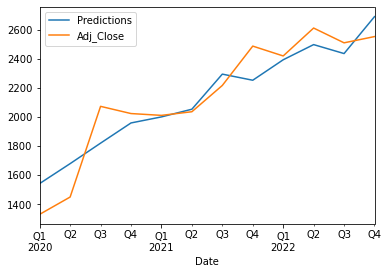

In [59]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Adj_Close'].plot(legend = True)

**Calculating the RMSE and MAPE Values for ARIMA Model**

In [60]:
rmse_ARIMA = RMSE(test.Adj_Close, predictions)
mape_ARIMA = MAPE(predictions,test.Adj_Close)
print("MAPE Value for ARIMA Model = " ,mape_ARIMA)
print("RMSE Value for ARIMA Model = " ,rmse_ARIMA)

MAPE Value for ARIMA Model =  6.27907089874351
RMSE Value for ARIMA Model =  148.84364295202732


**Comparing the All the results of Builded Models**

In [61]:
arima_result = pd.DataFrame({
    "MODEL": ["Arima_model"],
    "MAPE_Values": [mape_ARIMA],
    "RMSE_Values": [rmse_ARIMA]})
Results=Results.append(arima_result)
Results.sort_values(['RMSE_Values','MAPE_Values'],ascending = [True, True])

,MODEL,MAPE_Values,RMSE_Values
0,Arima_model,6.279071,148.843643
3,holtw_add_add_model,13.029693,343.705363
4,holtw_mult_add_model,19.205554,377.953315
1,holt_model,15.675039,428.600390
2,holt_winter_model,44.174789,1059.797141
0,linear_model,55.542131,1182.300174
2,quadratic_model,58.370974,1233.689130
0,ses_model,57.412700,1244.608396
3,additive_seasonality_model,80.311374,1579.996320
5,multiplicative_additive_model,99.543316,1872.236971


From the above results table we can see that **ARIMA Model** has gave the **least RMSE and MAPE Values** as **6.279088 & 148.843976**.<br> So we predict or Forcast the upcoming 
years Closing values of **Reliance Stock using the ARIMA Model**

**Forecast using ARIMA Model**

<AxesSubplot:xlabel='Date'>

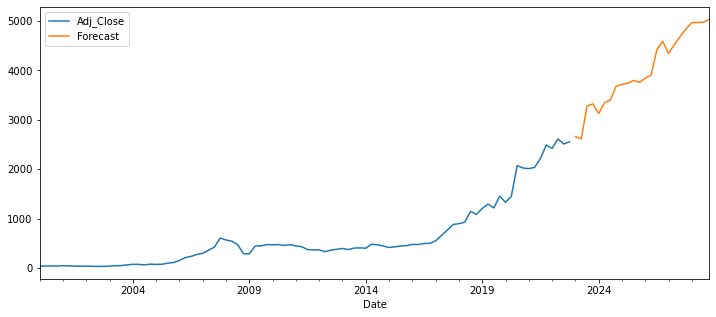

In [62]:
# Train the model on the full dataset
model = model = SARIMAX(df['Adj_Close'], 
                        order = (2, 1, 2), 
                        seasonal_order =(0, 1, 0, 12))
result = model.fit()
  
# Forecast for the next 2 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 2 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['Adj_Close'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)